<a href="https://colab.research.google.com/github/21-LAKSHMI/AI-AND-ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
import zipfile
import os

# Extract zip
with zipfile.ZipFile("cat & dog dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

# Check extracted folders
print(os.listdir("data"))


['cats_set', 'dogs_set']


In [3]:
train_dir = "data"  # inside it you have cats/ and dogs/

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # binary: cat vs dog
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 6: Train model
history = model.fit(
    train_gen,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_gen,
    validation_steps=50
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 25/100 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.5481 - loss: 0.8566

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 332ms/step - accuracy: 0.5383 - loss: 0.7780 - val_accuracy: 0.5200 - val_loss: 0.6916
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.5671 - loss: 0.6806 - val_accuracy: 0.5700 - val_loss: 0.6760
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.6454 - loss: 0.6340 - val_accuracy: 0.6100 - val_loss: 0.6686
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 339ms/step - accuracy: 0.6968 - loss: 0.5763 - val_accuracy: 0.6200 - val_loss: 0.6742
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - accuracy: 0.7523 - loss: 0.4984 - val_accuracy: 0.5650 - val_loss: 0.7397
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 337ms/step - accuracy: 0.8249 - loss: 0.3985 - val_accuracy: 0.5600 - val_loss: 0.9188
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.8527 - loss: 0.3300 - val_accuracy: 0.5700 - val_loss: 0.9804
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 335ms/step - accuracy: 0.9089 - loss: 0.2361 - val

In [8]:
# Step 7: Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [9]:
epochs = range(len(acc))

In [10]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

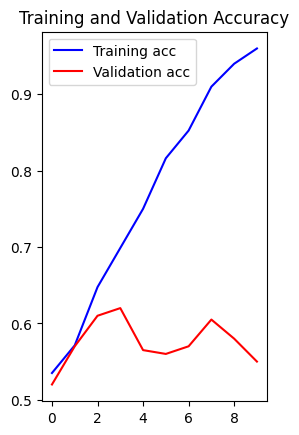

In [11]:
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.legend()
plt.title("Training and Validation Accuracy")

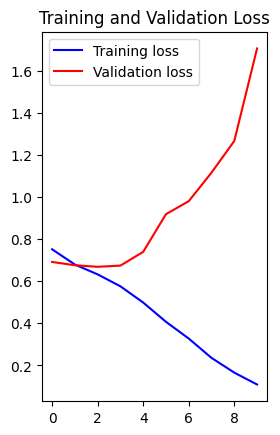

In [12]:
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.title("Training and Validation Loss")

plt.show()